# Deep Learning Project
Your task is to create a new notebook modeled after this one, where:
- You've put all of your cleaning and prepration steps into a functions you load and use in a module.
- You create and train a simple appropriate model for your task.
- You assess the performance using the appropriate metric for your task.
- Compare the performance with your previous best non Deep Neural Network model. This probably will mean you copy and paste your training from your other notebook into this notebook.

In [1]:
from process import * # module that contains data preprocessing and cleaning (includes libraries)
from datetime import datetime
import numpy as np
import pandas as pd
import pylab
import calendar
from scipy import stats
import seaborn as sns
from sklearn import model_selection, preprocessing
from scipy.stats import kendalltau
import warnings
import matplotlib.pyplot as plt
import pandas

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [2]:
train = pd.read_csv('/mnt/c/users/efazh/DataProblems/Datasets/Tabular/Zillow/train_2016_v2.csv',parse_dates=["transactiondate"] )
props = pd.read_csv('/mnt/c/users/efazh/DataProblems/Datasets/Tabular/Zillow/property_2016.csv')
sample = pd.read_csv('/mnt/c/users/efazh/DataProblems/Datasets/Tabular/Zillow/sample_submission.csv')

In [3]:
for c in props.columns:
    props[c]=props[c].fillna(-1)
    if props[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(props[c].values))
        props[c] = lbl.transform(list(props[c].values))

In [4]:
train_df = train.merge(props, how='left',on='parcelid')
train_df.head(5)

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12643413,0.0218,2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
train_df["transactiondate"] = pd.to_datetime(train_df["transactiondate"])
train_df["transactiondate_year"] = train_df["transactiondate"].dt.year
train_df["transactiondate_month"] = train_df["transactiondate"].dt.month
train_df['transactiondate_quarter'] = train_df['transactiondate'].dt.quarter
train_df["transactiondate"] = train_df["transactiondate"].dt.day

In [6]:
train_df.fillna(-1.0)

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,transactiondate_year,transactiondate_month,transactiondate_quarter
0,11016594,0.0276,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.00,-1.0,-1.0,-1.000000e+00,2016,1,1
1,14366692,-0.1684,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.00,-1.0,-1.0,-1.000000e+00,2016,1,1
2,12098116,-0.0040,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.00,-1.0,-1.0,-1.000000e+00,2016,1,1
3,12643413,0.0218,2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.00,-1.0,-1.0,-1.000000e+00,2016,1,1
4,14432541,-0.0050,2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.00,-1.0,-1.0,-1.000000e+00,2016,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90270,10774160,-0.0356,30,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.00,-1.0,-1.0,-1.000000e+00,2016,12,4
90271,12046695,0.0070,30,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.00,-1.0,-1.0,-1.000000e+00,2016,12,4
90272,12995401,-0.2679,30,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.00,-1.0,-1.0,-1.000000e+00,2016,12,4
90273,11402105,0.0602,30,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.00,-1.0,-1.0,-1.000000e+00,2016,12,4


In [7]:
x_train = train_df.drop(['parcelid', 'logerror', 'transactiondate', 'propertyzoningdesc', 'propertycountylandusecode','fireplacecnt', 'fireplaceflag'], axis=1)
y_train = train_df["logerror"]

In [8]:
y_mean = np.mean(y_train)
print(x_train.shape, y_train.shape)
train_columns = x_train.columns

(90275, 56) (90275,)


In [9]:
for c in x_train.dtypes[x_train.dtypes == object].index.values:
    x_train[c] = (x_train[c] == True)

# Keras Sequential

In [10]:
from keras.models import Sequential
from keras.layers import Dense

2024-04-22 21:22:10.827686: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 21:22:11.304369: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 21:22:11.306551: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-22 21:22:13.461231: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [11]:
# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))  # Input layer with 64 neurons and ReLU activation
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons and ReLU activation
model.add(Dense(1, activation='linear'))  # Output layer with 1 neuron for regression

2024-04-22 21:22:18.274664: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-22 21:22:18.277436: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [12]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3648      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,761
Trainable params: 5,761
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
2257/2257 [==============================] - 7s 3ms/step - loss: nan - val_loss: nan
Epoch 2/10
2257/2257 [==============================] - 7s 3ms/step - loss: nan - val_loss: nan
Epoch 3/10
2257/2257 [==============================] - 7s 3ms/step - loss: nan - val_loss: nan
Epoch 4/10
2257/2257 [==============================] - 7s 3ms/step - loss: nan - val_loss: nan
Epoch 5/10
2257/2257 [==============================] - 7s 3ms/step - loss: nan - val_loss: nan
Epoch 6/10
2257/2257 [==============================] - 7s 3ms/step - loss: nan - val_loss: nan
Epoch 7/10
2257/2257 [==============================] - 7s 3ms/step - loss: nan - val_loss: nan
Epoch 8/10
2257/2257 [==============================] - 7s 3ms/step - loss: nan - val_loss: nan
Epoch 9/10
2257/2257 [==============================] - 7s 3ms/step - loss: nan - val_loss: nan
Epoch 10/10
2257/2257 [==============================] - 7s 3ms/step - loss: nan - val_loss: nan


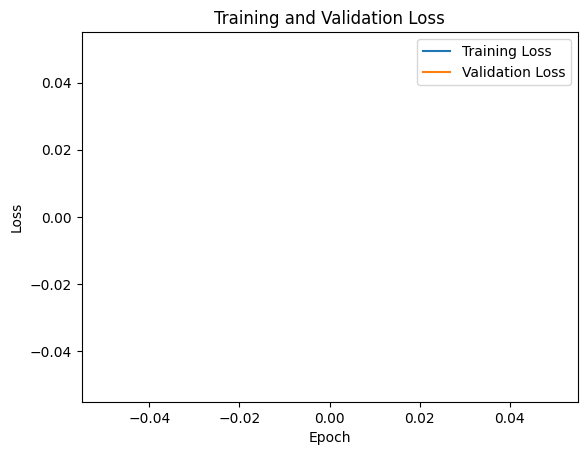

In [16]:
import matplotlib.pyplot as plt

# Fit the model on training data and save the training history
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()